#### 📈 Análise de Temperatura - Cidade de Londres

Este notebook faz parte do meu portfólio de Ciência de Dados.

##### 🎯 Objetivo
Analisar a variação de temperatura na cidade de Brisbane ao longo do tempo, usando um dataset público de clima.

##### 📂 Dataset
- Nome: Weather WWII Dataset
- Fonte: Kaggle (https://www.kaggle.com/datasets/smid80/weatherww2)

##### 🛠️ Tecnologias utilizadas
- Python
- Pandas
- Matplotlib
- Seaborn

## BIBLIOTECAS:

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATASET:

In [87]:
df = pd.read_csv('C:\MeusProjetos\portfolio-data-science-yukio\Python_Basics\Analise_Temperatura_Cidade\Summary of Weather.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Yukio Kitamura\AppData\Local\Temp\ipykernel_9136\95859732.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('C:\MeusProjetos\portfolio-data-science-yukio\Python_Basics\Analise_Temperatura_Cidade\Summary of Weather.csv')
C:\Users\Yukio Kitamura\AppData\Local\Temp\ipykernel_9136\95859732.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\MeusProjetos\portfolio-data-science-yukio\Python_Basics\Analise_Temperatura_Cidade\Summary of Weather.csv')


In [88]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# FILTRANDO APENAS PARA 'Brisbane' ('Brisbane' é a cidade que queremos analisar)
# WBAN = STA = 82506
df = df[df['STA'] == 82506]

## ANÁLISE EXPLORATÓRIA DE DADOS (EDA):

In [90]:
# SHAPE:
df.shape

(415, 31)

In [91]:
# COLUMNS:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [92]:
# INFO:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 118625 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STA          415 non-null    int64  
 1   Date         415 non-null    object 
 2   Precip       415 non-null    object 
 3   WindGustSpd  0 non-null      float64
 4   MaxTemp      415 non-null    float64
 5   MinTemp      415 non-null    float64
 6   MeanTemp     415 non-null    float64
 7   Snowfall     414 non-null    object 
 8   PoorWeather  43 non-null     object 
 9   YR           415 non-null    int64  
 10  MO           415 non-null    int64  
 11  DA           415 non-null    int64  
 12  PRCP         246 non-null    object 
 13  DR           0 non-null      float64
 14  SPD          0 non-null      float64
 15  MAX          415 non-null    float64
 16  MIN          415 non-null    float64
 17  MEA          415 non-null    float64
 18  SNF          414 non-null    object 
 19  SND  

In [93]:
# DESCRIBE:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,415.0,0.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,82506.0,NaN,26.883534,15.677376,21.255689,44.802410,7.272289,15.961446,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,3.807793,3.897415,3.611358,0.398662,3.704753,8.764689,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,82506.0,NaN,13.888889,3.888889,11.111111,44.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,82506.0,NaN,23.888889,13.333333,18.888889,45.000000,4.000000,8.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,82506.0,NaN,27.222222,16.666667,21.666667,45.000000,7.000000,16.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,82506.0,NaN,30.000000,18.333333,24.444444,45.000000,11.000000,23.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,82506.0,NaN,37.222222,24.444444,28.888889,45.000000,12.000000,31.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# VERIFICAÇÃO DE DADOS FALTANTES:
print(f'Valores nulos: \n{df.isnull().sum()}')

Valores nulos: 
STA              0
Date             0
Precip           0
WindGustSpd    415
MaxTemp          0
MinTemp          0
MeanTemp         0
Snowfall         1
PoorWeather    372
YR               0
MO               0
DA               0
PRCP           169
DR             415
SPD            415
MAX              0
MIN              0
MEA              0
SNF              1
SND            415
FT             415
FB             415
FTI            415
ITH            415
PGT            415
TSHDSBRSGF     372
SD3            415
RHX            415
RHN            415
RVG            415
WTE            415
dtype: int64


In [95]:
# VERIFICAR INCONSISTENCIAS: MinTEMP > MaxTemp
df[df['MinTemp'] > df['MaxTemp']]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE


In [96]:
# NÚMERO DE REGISTROS INCONSISTENTES:
df[df['MinTemp'] > df['MaxTemp']].shape[0]

0

#### DISTRIBUIÇÃO DAS TEMPERATURAS:

##### TEMPERATURA MÁXIMA:

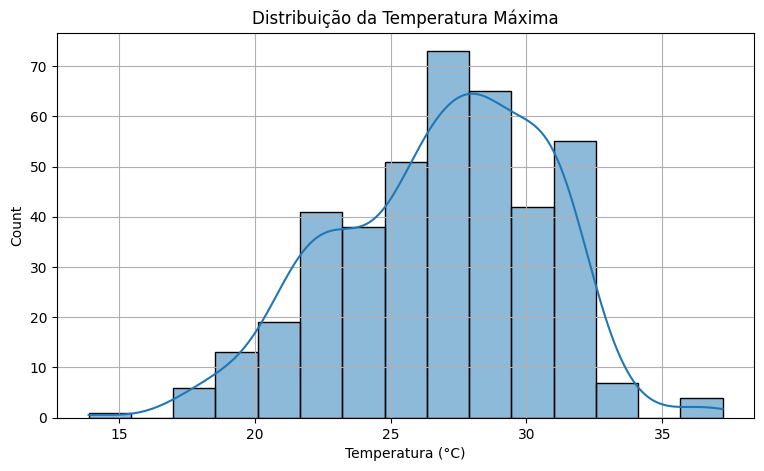

In [98]:
plt.figure(figsize=(9, 5))
sns.histplot(df['MaxTemp'].dropna(), kde=True)
plt.title('Distribuição da Temperatura Máxima')
plt.xlabel('Temperatura (°C)')
plt.grid(True)
plt.show()

##### TEMPERATURA MÍNIMA:

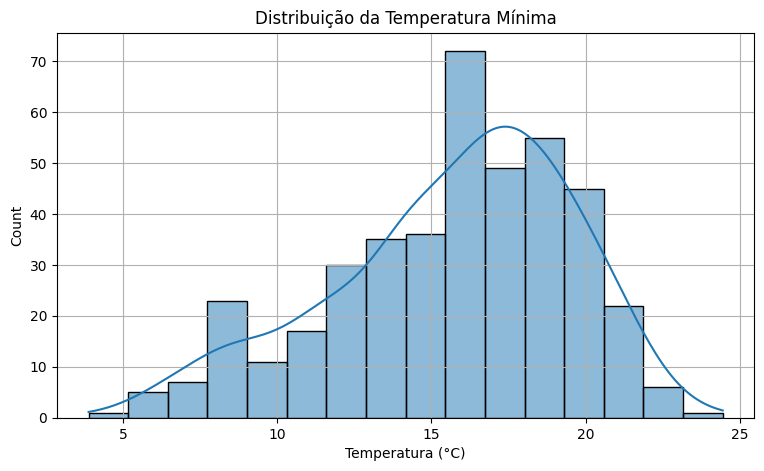

In [99]:
plt.figure(figsize=(9, 5))
sns.histplot(df['MinTemp'].dropna(), kde=True)
plt.title('Distribuição da Temperatura Mínima')
plt.xlabel('Temperatura (°C)')
plt.grid(True)
plt.show()

##### TEMPERATURA MÉDIA:

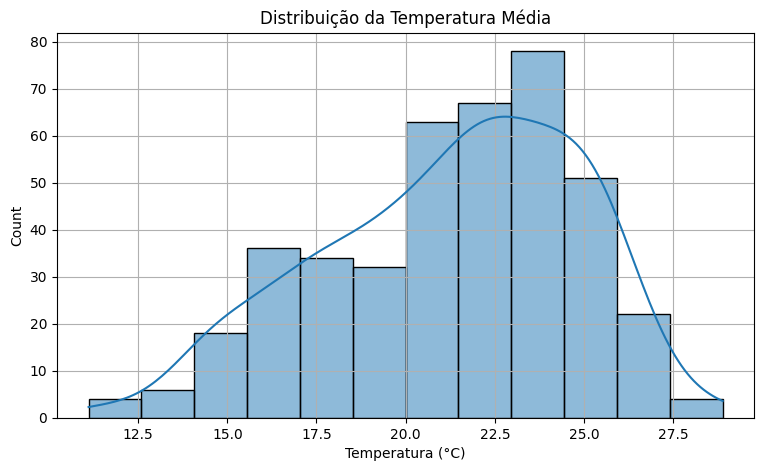

In [100]:
plt.figure(figsize=(9, 5))
sns.histplot(df['MeanTemp'].dropna(), kde=True)
plt.title('Distribuição da Temperatura Média')
plt.xlabel('Temperatura (°C)')
plt.grid(True)
plt.show()

#### OUTLIERS:

In [101]:
# BACKUP CASO NECESSÁRIO:
df_backup = df.copy()

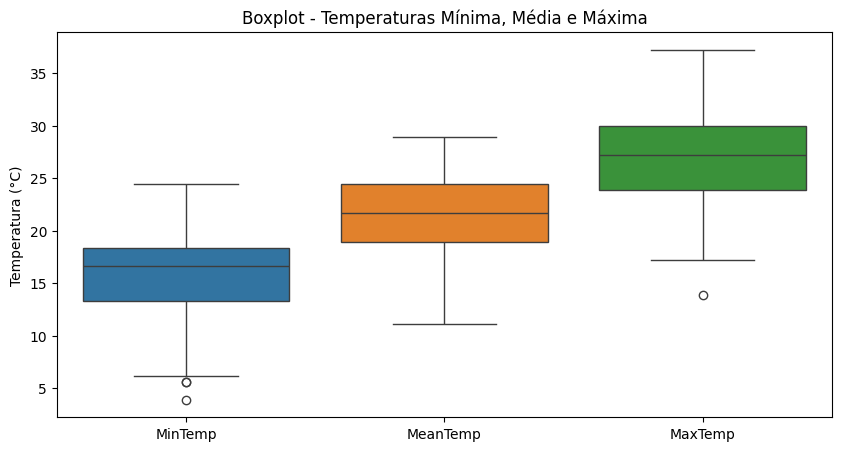

In [102]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['MinTemp', 'MeanTemp', 'MaxTemp']])
plt.title('Boxplot - Temperaturas Mínima, Média e Máxima')
plt.ylabel('Temperatura (°C)')
plt.show()


In [103]:
# FUNÇÃO PARA CONTAR OUTLIERS USANDO A DISTÂNCIA INTERQUARTIL (IQR):
def contar_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = series[(series < limite_inferior) | (series > limite_superior)]
    return outliers.shape[0]

In [104]:
# QUANTIDADE DE OUTLIERS EM CADA COLUNA:
print("Outliers em MaxTemp:", contar_outliers(df['MaxTemp']))
print("Outliers em MinTemp:", contar_outliers(df['MinTemp']))
print("Outliers em MeanTemp:", contar_outliers(df['MeanTemp']))

Outliers em MaxTemp: 1
Outliers em MinTemp: 3
Outliers em MeanTemp: 0


In [105]:
# FUNÇÃO PARA REMOVER OUTLIERS USANDO A DISTÂNCIA INTERQUARTIL (IQR):
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    return df

In [106]:
df = remover_outliers(df, 'MaxTemp')
df = remover_outliers(df, 'MinTemp')
df = remover_outliers(df, 'MeanTemp')

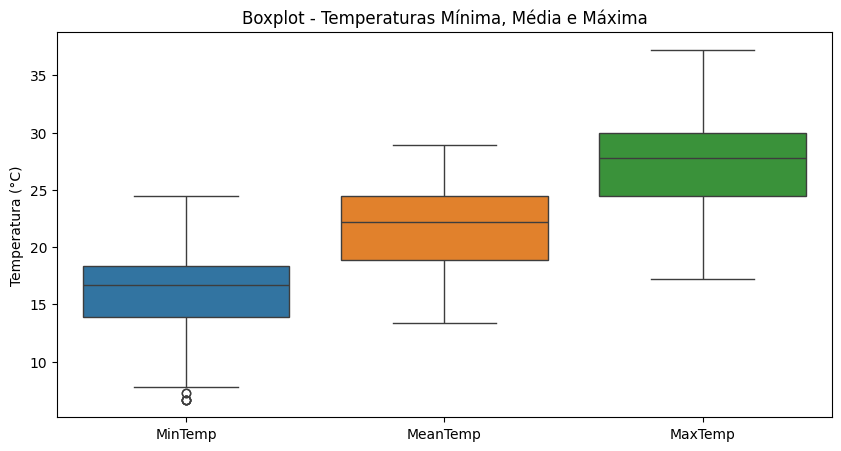

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['MinTemp', 'MeanTemp', 'MaxTemp']])
plt.title('Boxplot - Temperaturas Mínima, Média e Máxima')
plt.ylabel('Temperatura (°C)')
plt.show()

#### EVOLUÇÃO TEMPORAL DAS TEMPERATURAS (GRÁFICO DE LINHAS)

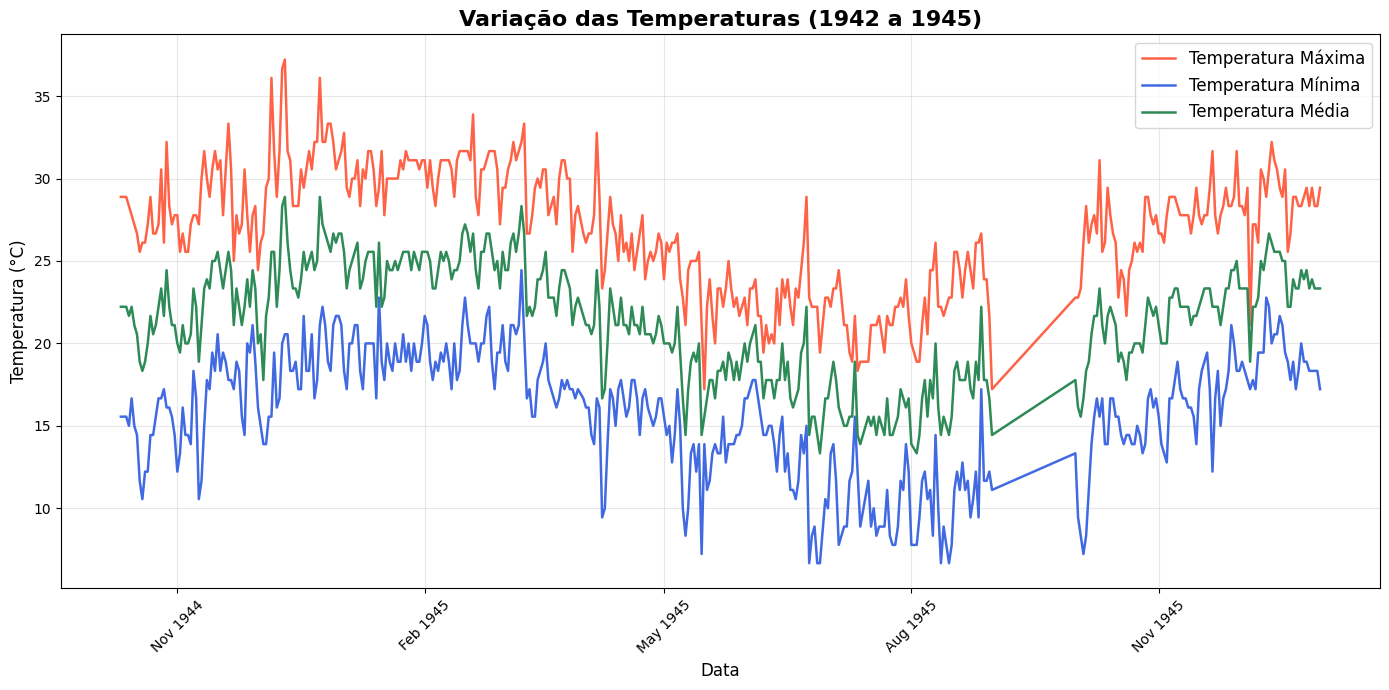

In [108]:
import matplotlib.dates as mdates

plt.figure(figsize=(14,7))

plt.plot(pd.to_datetime(df['Date']), df['MaxTemp'], color='tomato', label='Temperatura Máxima', linewidth=1.8)
plt.plot(pd.to_datetime(df['Date']), df['MinTemp'], color='royalblue', label='Temperatura Mínima', linewidth=1.8)
plt.plot(pd.to_datetime(df['Date']), df['MeanTemp'], color='seagreen', label='Temperatura Média', linewidth=1.8)

plt.title('Variação das Temperaturas (1942 a 1945)', fontsize=16, weight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Eixo X com tick a cada 3 meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

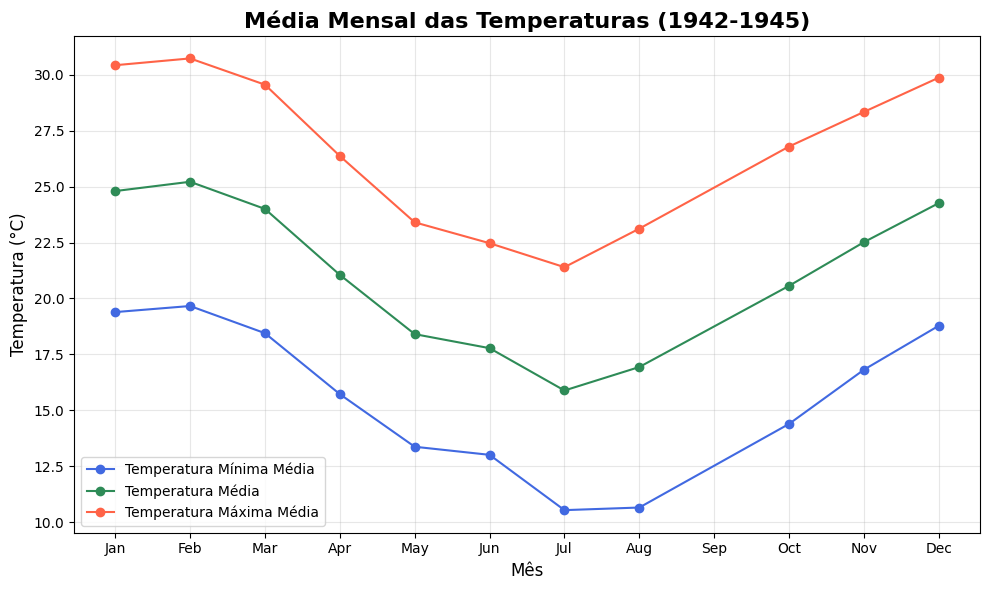

In [109]:
# Garantir que a coluna Date está em datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Agrupar por mês (média de todos os anos)
monthly_avg = df.groupby('Month')[['MinTemp', 'MeanTemp', 'MaxTemp']].mean()

# Plotar o gráfico
plt.figure(figsize=(10,6))

plt.plot(monthly_avg.index, monthly_avg['MinTemp'], marker='o', color='royalblue', label='Temperatura Mínima Média')
plt.plot(monthly_avg.index, monthly_avg['MeanTemp'], marker='o', color='seagreen', label='Temperatura Média')
plt.plot(monthly_avg.index, monthly_avg['MaxTemp'], marker='o', color='tomato', label='Temperatura Máxima Média')

plt.title('Média Mensal das Temperaturas (1942-1945)', fontsize=16, weight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

## CONCLUSÕES:

Nesta análise exploratória, foi possível investigar a variação de temperatura na cidade de Brisbane, Austrália, durante o período de julho de 1942 a dezembro de 1945.

## 1. Principais Insights:

#### * Comportamento das Temperaturas:
Ao longo dos anos analisados, Brisbane apresentou uma clara variação sazonal, com temperaturas mais elevadas nos meses de verão (dezembro a fevereiro) e mais baixas nos meses de inverno (junho a agosto).

#### * Tendências Mensais:
A média das temperaturas máximas e mínimas por mês indicou um padrão climático típico de clima subtropical, com diferenças bem marcadas entre estações.

#### * Distribuição das Temperaturas:
A distribuição das temperaturas mínimas e máximas mostrou um comportamento coerente com o esperado para a região, com predominância de temperaturas amenas a altas.

## 2. Limitações da Análise:
O dataset contempla apenas um período histórico específico (1942 a 1945), o que pode não refletir o comportamento climático atual.

Alguns dados estavam faltantes, o que exigiu limpeza e tratamento, reduzindo o volume de amostras em algumas análises.

Além disso, nos limitamos apenas a analise para a cidade de Brisbane ma Austrália.

## 3. Próximos Passos (para um futuro aprofundamento):
Análise de outros fatores climáticos disponíveis no dataset, como precipitação ou velocidade do vento.

Comparação com dados climáticos de outros períodos ou de outras cidades.

Criação de modelos preditivos de temperatura, usando aprendizado de máquina.